<h1 align='center' style='color:purple'>Clustering With K Means </h1>

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

A note on Scalars - used to preprocess numerical features and fit them in a common scale

StandardScaler
* *How it Works?* : Centers data around the mean (0) with a standard deviation of 1 (Z-score normalization).
* *When to Use?* : When data is approximately normally distributed (Gaussian) and for algorithms that assume this distribution, such as Linear Regression, SVMs, and PCA.
* *Sensitivity to Outliers?* : Yes, the mean and standard deviation are heavily influenced by extreme values.

MinMaxScaler
* *How it Works?* :Rescales data to a fixed range, typically [0, 1], using the minimum and maximum values.
* *When to Use?* : When a predefined range is required (e.g., in Neural Networks that expect input values in a specific range) or when the data is not normally distributed and outliers are minimal.
* *Sensitivity to Outliers?* : Yes, highly sensitive, as a single outlier can compress the bulk of the data into a very narrow range.

RobustScaler
* *How it Works?* : Scales data using the median and the interquartile range (IQR).
* *When to Use?* : When the dataset contains outliers or is skewed, as this method is less affected by extreme values.
* *Sensitivity to Outliers?* : No, it is robust to outliers, making it a good "safest bet" for real-world, messy data.

In [4]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

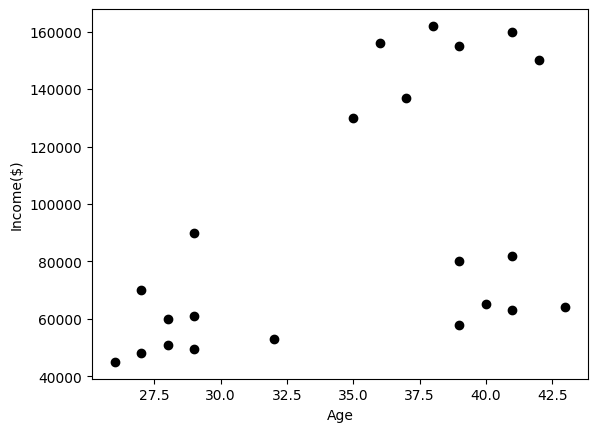

In [5]:
plt.scatter(df.Age,df['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income($)')

In [6]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [7]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


In [8]:
km.cluster_centers_

array([[3.63333333e+01, 8.40000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.24166667e+01, 5.72916667e+04]])

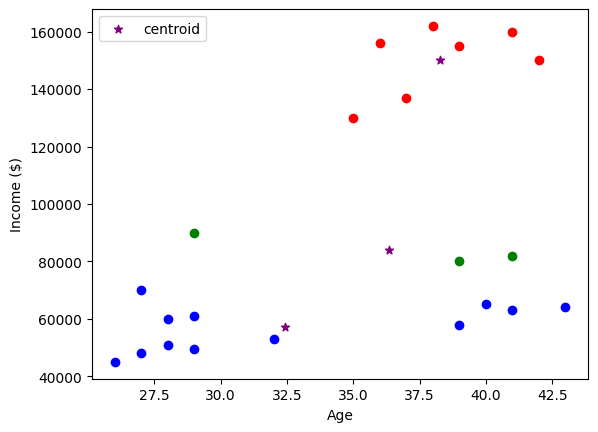

In [9]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Preprocessing using min max scaler</h4>

In [10]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

In [11]:
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


Text(0, 0.5, 'Income ($)')

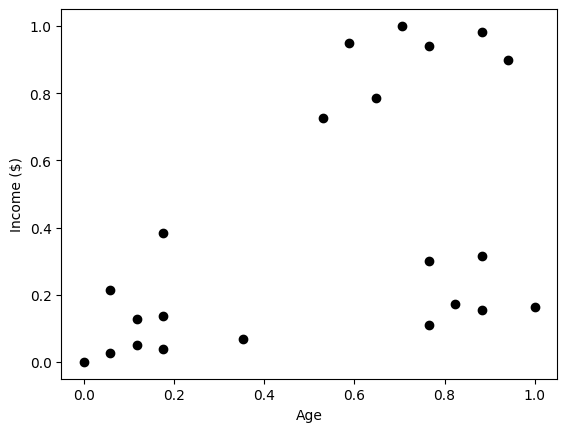

In [12]:
plt.scatter(df.Age,df['Income($)'], color='black')
plt.xlabel('Age')
plt.ylabel('Income ($)')

In [13]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [14]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


In [15]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

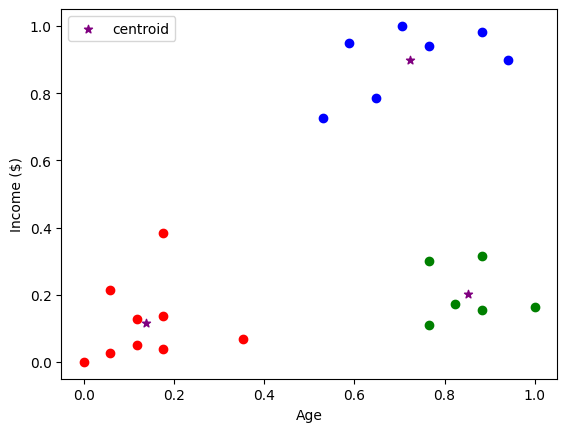

In [16]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

<h4 style='color:purple'>Elbow Plot</h4>

In [17]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

<h4 style='color:purple'>Exercise</h4>

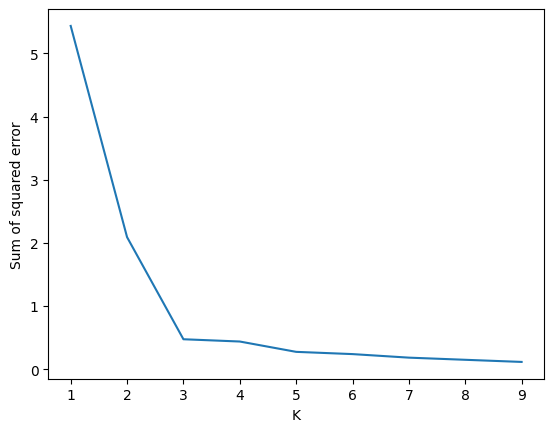

In [18]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

So the K value (based on the elbow of the plot) is 3

# K Means for clustering data points in Iris dataset

1. Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.
2. Figure out if any preprocessing such as scaling would help here
3. Draw elbow plot and from that figure out optimal value of k

In [29]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [30]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [31]:
#Recording each example as record in pandas DataFrame (optional)
df = pd.DataFrame(data=iris.data[:, 2:], columns=iris.feature_names[2:]) #using petal width and petal length features only
labels = iris.target
#df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#df.drop(df.columns[[0,1]], axis=1, inplace=True)
print(df)

#Normalizing (Standardizing) the dataset
scaler = preprocessing.StandardScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

print(df)

     petal length (cm)  petal width (cm)
0                  1.4               0.2
1                  1.4               0.2
2                  1.3               0.2
3                  1.5               0.2
4                  1.4               0.2
..                 ...               ...
145                5.2               2.3
146                5.0               1.9
147                5.2               2.0
148                5.4               2.3
149                5.1               1.8

[150 rows x 2 columns]
     petal length (cm)  petal width (cm)
0            -1.340227         -1.315444
1            -1.340227         -1.315444
2            -1.397064         -1.315444
3            -1.283389         -1.315444
4            -1.340227         -1.315444
..                 ...               ...
145           0.819596          1.448832
146           0.705921          0.922303
147           0.819596          1.053935
148           0.933271          1.448832
149           0.762758          0

Text(0, 0.5, 'petal width (cm)')

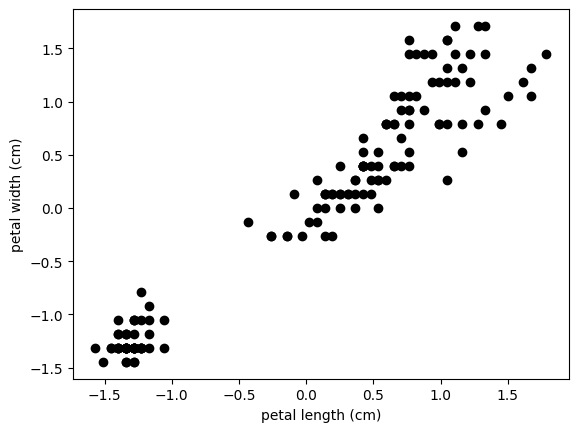

In [32]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], color='black')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

Visualizing the ground truth (for better visualization)

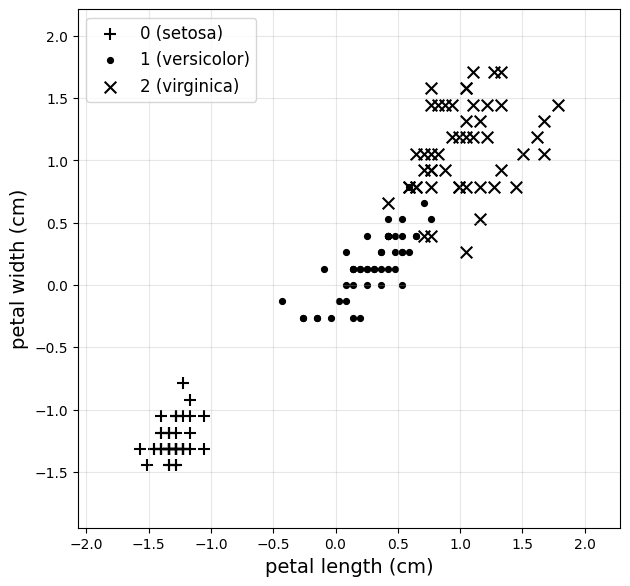

In [45]:
#print(type(df)) if df is pandas Dataframe then use df.iloc[] for indexing, if df is numpy array then use df[] for indexing
marker_list = ['+', '.', 'x']
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)
ax.set_aspect('equal')

for l in [0, 1, 2]:
  ax.scatter(df.iloc[labels == l, 0], df.iloc[labels == l, 1], marker=marker_list[l], s=70, color='black',
             label='{:d} ({:s})'.format(l, iris.target_names[l]))

ax.legend(fontsize=12)
ax.set_xlabel(iris.feature_names[2], fontsize=14)
ax.set_ylabel(iris.feature_names[3], fontsize=14)
ax.grid(alpha=0.3)
ax.set_xlim(df.iloc[:, 0].min() - 0.5, df.iloc[:, 0].max() + 0.5)
ax.set_ylim(df.iloc[:, 1].min() - 0.5, df.iloc[:, 1].max() + 0.5)
plt.show()

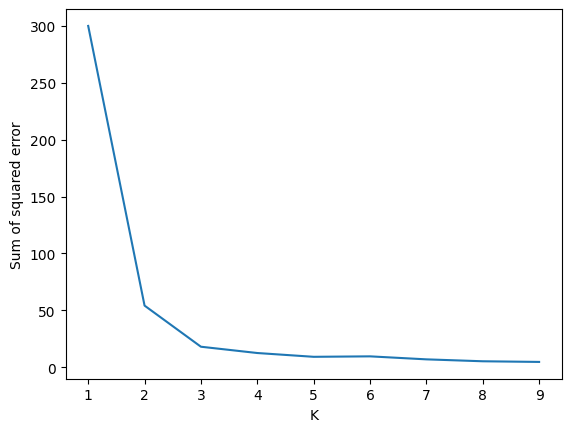

In [51]:
sse_list = [] #list to store the sum of squared euclidean distance errors
k_rng = range(1, 10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['petal length (cm)', 'petal width (cm)']])
  sse_list.append(km.inertia_)

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse_list)

There is a possibility of either K = 2 & K = 3. The k value point on the graph where the rate of decrease in within-cluster sum of squares slows down significantly, resembling an elbow. So it's certain that K = 3 is the right k value

     petal length (cm)  petal width (cm)  predicted_labels
0            -1.340227         -1.315444                 0
1            -1.340227         -1.315444                 0
2            -1.397064         -1.315444                 0
3            -1.283389         -1.315444                 0
4            -1.340227         -1.315444                 0
..                 ...               ...               ...
145           0.819596          1.448832                 1
146           0.705921          0.922303                 1
147           0.819596          1.053935                 1
148           0.933271          1.448832                 1
149           0.762758          0.790671                 1

[150 rows x 3 columns]


Text(0, 0.5, 'petal width (cm)')

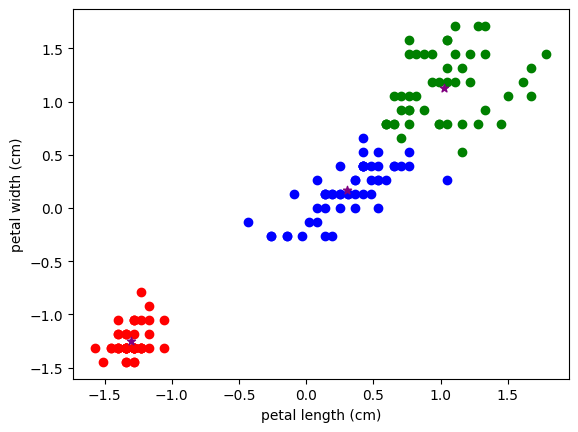

In [62]:
km = KMeans(n_clusters=3)
predicted_labels = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
df['predicted_labels'] = predicted_labels
print(df)

df0 = df[df.predicted_labels == 0] #records with k = 0
df1 = df[df.predicted_labels == 1] #records with k = 1
df2 = df[df.predicted_labels == 2] #records with k = 2

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='green')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue')

#plotting the centres
centres = km.cluster_centers_

plt.scatter(centres[:,0], centres[:,1], color='purple', marker='*', label='centre')

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')